In [2]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [5]:
# get data files
#!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

#!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

In [6]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

## Explore the data

In [8]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [9]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [10]:
df_ratings.shape # More than one million ratings including same users rating different books 

(1149780, 3)

In [11]:
df_books.shape # More than 270 K books 

(271379, 3)

<AxesSubplot:>

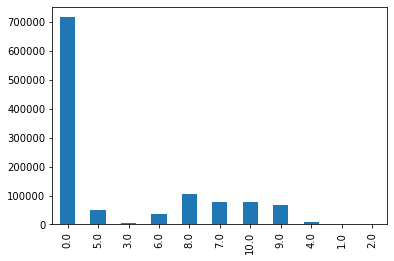

In [12]:
df_ratings.rating.value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

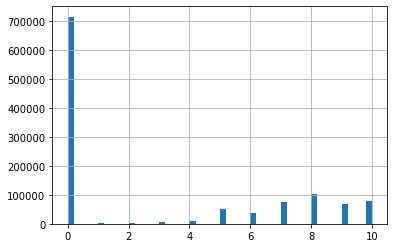

In [13]:
df_ratings.rating.hist(bins = 50)

In [ ]:
# Above plots show that ratings are very un-evenly distrubed, most ratings are 0, meaning they have read the 
# books but not rated.  
# To ensure statistical significance, 
# remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

In [16]:
counts_usrrate = df_ratings['user'].value_counts()
counts_books = df_ratings['isbn'].value_counts()

#print(counts_usrrate) #un-comment to see the corresponding rating count of a given user 
#print(counts_books)     #un-comment to see the corresponding rating count of a given book with an ISBN

In [ ]:
# We need to define a new df_ratings data frame taking into account users and books according to the criteria above

In [17]:
df_ratings = df_ratings[df_ratings['user'].isin(counts_usrrate[counts_usrrate >= 200].index)]
df_ratings = df_ratings[df_ratings['isbn'].isin(counts_books[counts_books >= 100].index)]

In [18]:
df_ratings.head()

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0


In [19]:
rates_w_books = pd.merge(right=df_ratings, left = df_books, on="isbn")

In [20]:
rates_w_books.head(30)

,isbn,title,author,user,rating
0,0440234743,The Testament,John Grisham,277478,0.0
1,0440234743,The Testament,John Grisham,2977,0.0
2,0440234743,The Testament,John Grisham,3363,0.0
3,0440234743,The Testament,John Grisham,7346,9.0
4,0440234743,The Testament,John Grisham,9856,0.0
5,0440234743,The Testament,John Grisham,11676,9.0
6,0440234743,The Testament,John Grisham,13552,8.0
7,0440234743,The Testament,John Grisham,14521,0.0
8,0440234743,The Testament,John Grisham,16795,0.0
9,0440234743,The Testament,John Grisham,23768,0.0


In [21]:
rates_w_books.shape

(49517, 5)

In [22]:
# We need to remove duplicates in the merged data frame with respect to title and user coloumns 
# There should not be same user rating the book with the same title

df = rates_w_books.drop_duplicates(subset=["title", "user",])

In [23]:
df.shape

(49136, 5)

In [ ]:
# Comparing with the above rates_w_books data set there were about 400 duplicates 

In [24]:
# Define a pivot matrix/Table by reshaping our final data frame 'df' in a form 
# where titles are in the row users in the coloumns and values are ratings 

df_piv = df.pivot(index='title', columns='user', values='rating')

In [25]:
df_piv.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_piv = df_piv.fillna(0) #  fill NaN's with zeros 
df_piv.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_piv.shape

(673, 888)

In [28]:
# convert dataframe to scipy sparse matrix

rating_matrix = csr_matrix(df_piv.values)

In [29]:
# mapping from index in sparse matrix to titles

book_titles = list(df_piv.index.values)

In [ ]:
# Define the model and train 

In [30]:
model = NearestNeighbors(algorithm="brute", metric="cosine")
model.fit(rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [31]:
X = df_piv.values

def title_2_index(title):
    ind = book_titles.index(title)
    return X[ind,:]

def index_2_title(ind):
    return book_titles[ind]

row = title_2_index("Where the Heart Is (Oprah's Book Club (Paperback))")

print(row,len(row))

[ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  8.  8.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [33]:
dist, inds = model.kneighbors(np.reshape(row,[1,-1]),n_neighbors=6) 

In [ ]:
#.kneighbors outputs distance and the index of the books, recall there are 673 of them

In [34]:
dist

array([[0.        , 0.7234864 , 0.7677075 , 0.7699411 , 0.77085835,
        0.8016211 ]], dtype=float32)

In [35]:
inds

array([[654, 539, 240, 597, 614, 243]])

In [36]:
for index in inds:
    for i in range(6):
        print(index_2_title(index[i]))

Where the Heart Is (Oprah's Book Club (Paperback))
The Lovely Bones: A Novel
I Know This Much Is True
The Surgeon
The Weight of Water
I'll Be Seeing You


## The test module in FCC is screwed up a bit which expects the nearest neighbors in the reversed order compared to our predictions above. This confusion probably arise because of the cosine metric used in the model where the overlap, i.e the cosine of the dot product between two vectors representing the books tend to become larger for smaller distances. For this reason I reversed the predictions above to match with the test module of FCC. Look at the FCC forum for a discussion on this issue.

In [37]:
def get_recommends(book = ""):
    bookData = df_books.loc[df_books['title'] == book]
    #if len(bookData) != 1:  # book is not in database
    #    return [book, ["", 0.]*5]
    
    title  = bookData.iloc[0,:]['title']
    index = book_titles.index(title)
    neigh_dist, neigh_ind = model.kneighbors(X=rating_matrix[index, :], n_neighbors=6)
    
    recommended_books = [book, []]
    for ind, dist in zip(reversed(neigh_ind[0][2:]), reversed(neigh_dist[0][2:])):
        title = book_titles[ind]
        #title = df_books.loc[df_books['isbn'] == isbn].iloc[0, :]['title']
        recommended_books[1].append([title, dist])
        
    return recommended_books

In [38]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")

print(books)

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075]]]
